<h2>Binary Classification with a Bank Churn Dataset</h2>
<h4>專案目標：利用銀行客戶流失資料集，建立分類模型，分析客戶是否會繼續使用其帳戶或關閉帳戶。</h4>

[Kaggle Link: https://www.kaggle.com/competitions/playground-series-s4e1/overview](https://www.kaggle.com/competitions/playground-series-s4e1/overview)

**<h4>使用工具：</h4>**
<font>
1. Packages: pandas, numpy, scikit-learn, matplotlib, seaborn, xgboost, imblearn<br>
2. Models: Random Forest, XGBoost
</font>

**<h4>分析步驟：</h4>**
<font>
1. 導入需要的套件<br>
2. 讀取資料 & 查看資料集<br>
3. 探索性資料分析<br>
4. 特徵工程<br>
5. 建立分類模型 & 比較模型<br>
6. 使用較優模型(XGBoost)預測測試資料集<br>
7. 優化模型<br>
</font>

**<h4>模型結果摘要：</h4>**
<table>
    <tr>
        <th></th>
        <th>Random Forest_SMOTE</th>
        <th>XGBoost_SMOTE</th>
        <th>XGBoost_NoSMOTE</th>
        <th>XGBoost_SMOTE_Optimized</th>
        <th>XGBoost_NoSMOTE_Optimized</th>
    </tr>
    <tr>
        <th>Accuracy</th>
        <td align="center">0.84</td>
        <td align="center">0.84</td>
        <td align="center">0.86</td>
        <td align="center">0.84</td>
        <td align="center">0.84</td>
    </tr>
    <tr>
        <th align="center">AUC</th>
        <td align="center">0.82</td>
        <td align="center">0.88</td>
        <td align="center">0.88</td>
        <td align="center">0.88</td>
        <td align="center">0.88</td>
    </tr>
    <tr>
        <th align="center">Mean AUC</th>
        <td align="center">0.96</td>
        <td align="center">0.95</td>
        <td align="center">0.88</td>
        <td align="center">0.94</td>
        <td align="center">0.94</td>
    </tr>
    <tr>
        <th>F1-score</th>
        <td align="center">0.62</td>
        <td align="center">0.63</td>
        <td align="center">0.61</td>
        <td align="center">0.64</td>
        <td align="center">0.64</td>
    </tr>
    <tr>
        <th>Submission Score</th>
        <td align="center">-</td>
        <td align="center">0.75</td>
        <td align="center">0.76</td>
        <td align="center">0.76</td>
        <td align="center">0.76</td>
    </tr>
</table>

<h2>導入需要的套件</h2>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance

<h2>讀取資料集</h2>

In [7]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


<h2>查看資料集</h2>

In [10]:
train_df.shape, test_df.shape

((165034, 14), (110023, 13))

**<font color='navy'>
訓練資料集有165034筆資料、14個欄位<br>
測試資料集有110023筆資料、13個欄位(沒有Exited)
</font>**

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


**<font color='navy'>
辨識變數：id, CustomerId, Surname<br>
特徵變數(連續)：CreditScore, Age, Tenure, Balance, EstimatedSalary<br> 
特徵變數(類別)：Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember<br>
目標變數(類別)：Exited
</font>**

In [14]:
#定義連續變數與類別變數
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [15]:
train_df.drop(['id','CustomerId'], axis=1).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
#檢查遺失值
print(train_df.isnull().sum(), test_df.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


**<font color='navy'>
訓練資料集與測試資料集都沒有遺失值 >> 不用做遺失值處理
</font>**

<h2>探索性資料分析</h2>

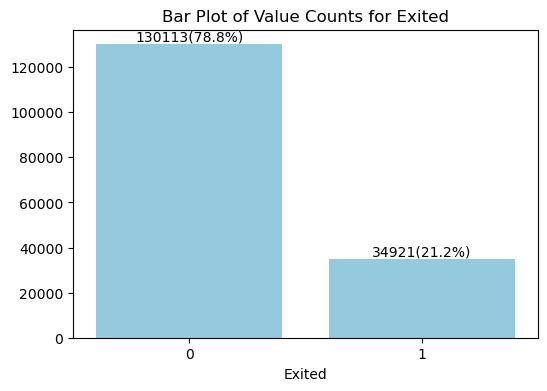

In [19]:
#計算各類別次數與百分比
category_counts = train_df['Exited'].value_counts()
category_percentages = train_df['Exited'].value_counts(normalize=True) * 100

#繪製長條圖
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, color='skyblue')
for bar, percentage in zip(ax.patches, category_percentages):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, "%d(%.1f%%)" % (yval, percentage), ha='center', va='bottom')
plt.xlabel("Exited")
plt.title("Bar Plot of Value Counts for Exited")
plt.xticks(rotation=0)
plt.show()

**<font color='navy'>
Exited的兩個類別樣本數懸殊 >> 建模時可以採用SMOTE平衡資料
</font>**

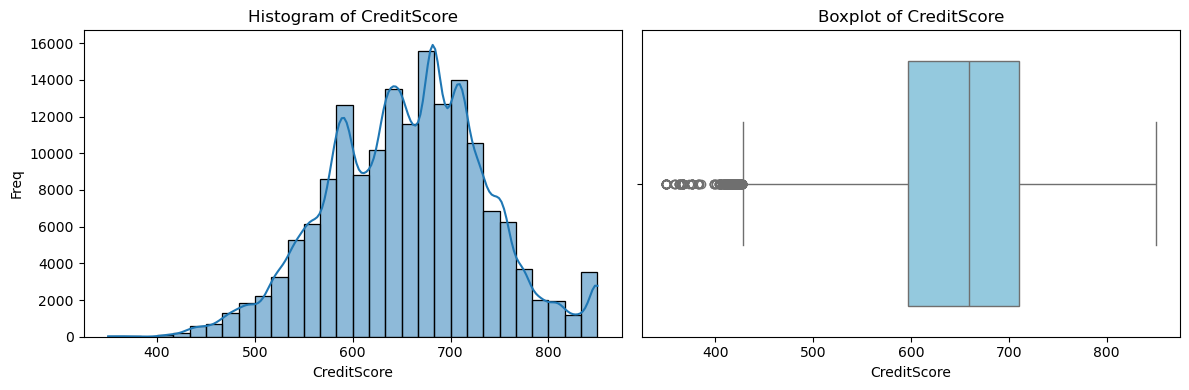

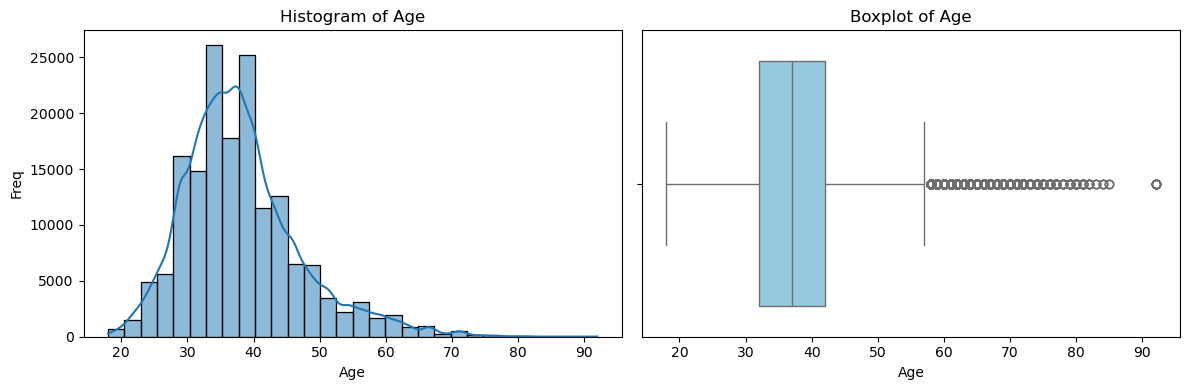

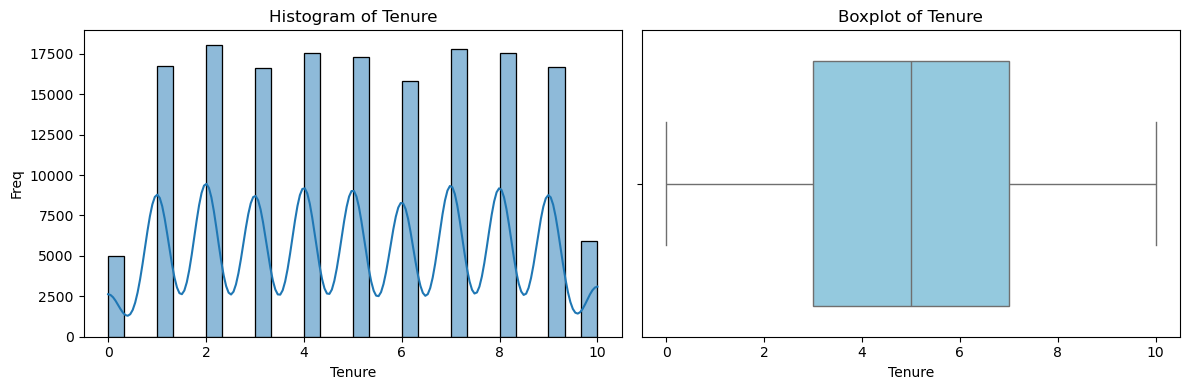

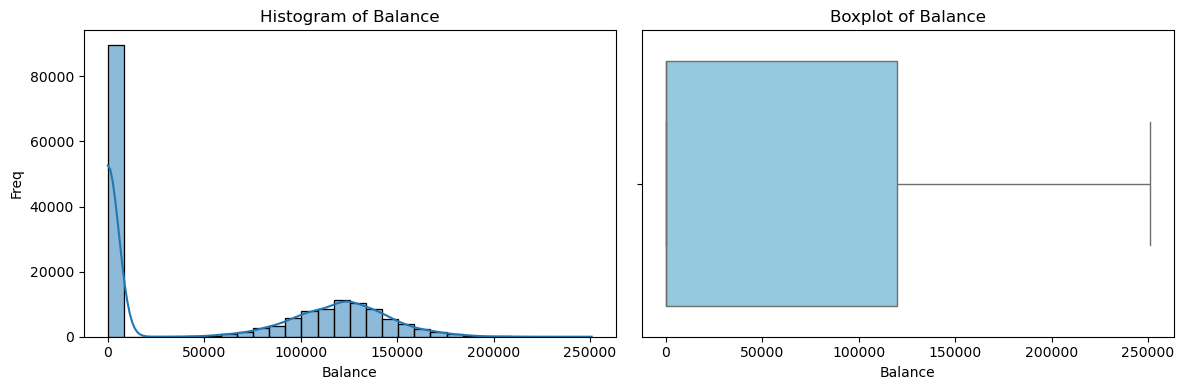

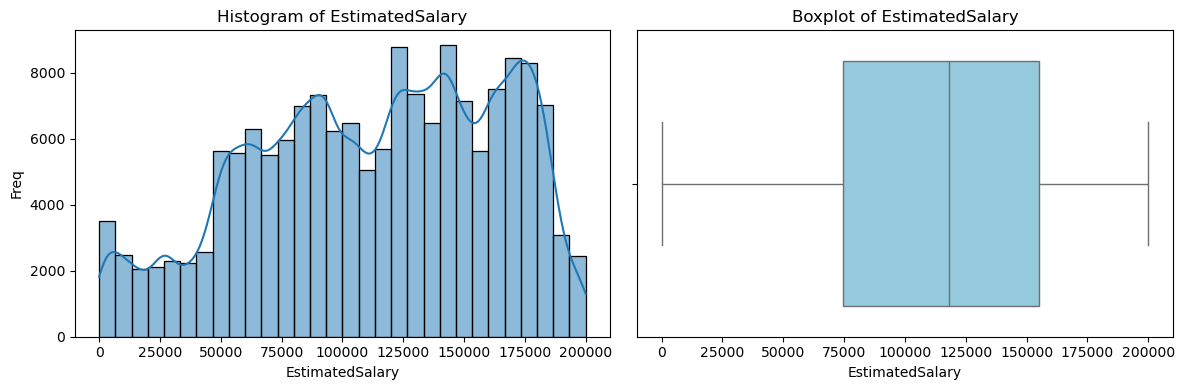

In [21]:
#繪製各個連續變數的直方圖與盒形圖
for var in continuous_vars:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    #繪製直方圖
    sns.histplot(train_df[var], bins=30, kde=True, ax=axes[0], edgecolor='black')
    axes[0].set_title("Histogram of %s" % var)
    axes[0].set_xlabel("%s" % var)
    axes[0].set_ylabel("Freq")
    #繪製盒形圖
    sns.boxplot(x=train_df[var], ax=axes[1], color='skyblue')
    axes[1].set_title("Boxplot of %s" % var)
    axes[1].set_xlabel(var)
    
    plt.tight_layout()
    plt.show()

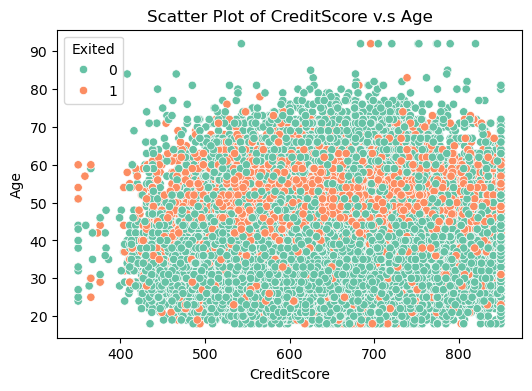

In [22]:
#以Exited分類繪製CreditScore與Age的散佈圖，觀察離群值是否都同屬同一Exited類別
plt.figure(figsize=(6,4))
sns.scatterplot(x='CreditScore', y='Age', hue='Exited', data=train_df, palette='Set2', legend='full')
plt.title("Scatter Plot of CreditScore v.s Age")
plt.xlabel("CreditScore")
plt.ylabel("Age")
plt.show()

In [23]:
#計算Balance=0的百分比
balance_0_ratio = (train_df['Balance'] == 0).mean() * 100
print("Balance=0的比例 =", round(balance_0_ratio, 2), "%")

Balance=0的比例 = 54.32 %


**<font color='navy'>
CreditScore呈現左偏分配，且可能存在離群值 >> 需處理離群值<br>
Age呈現右偏分配，且可能存在離群值 >> 需處理離群值<br>
有超過一半的樣本其信用餘額(Balance)為0 >> 可以嘗試將Balance離散化
</font>**

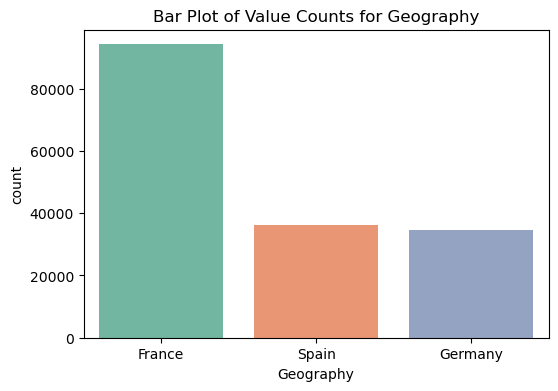

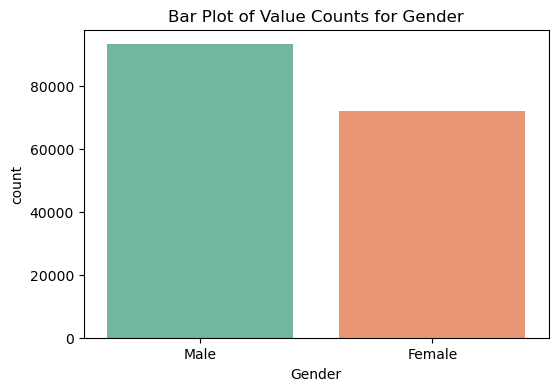

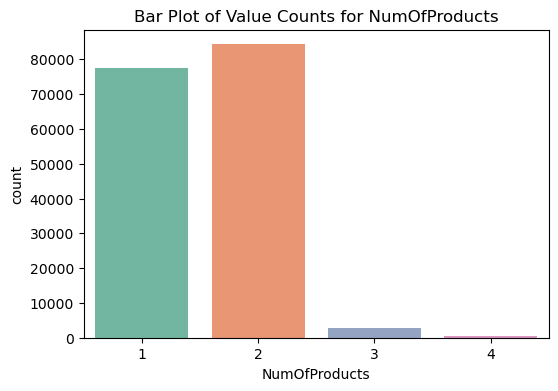

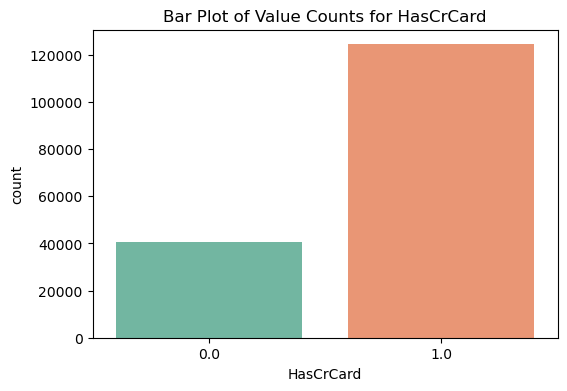

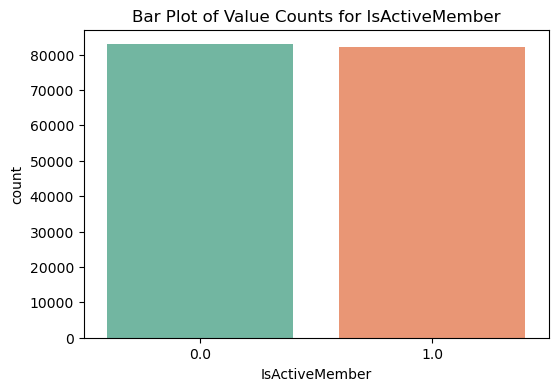

In [25]:
#繪製各個類別變數的次數長條圖
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=var, data=train_df, hue=var, palette='Set2', legend=False)
    plt.xlabel("%s" % var)
    plt.title("Bar Plot of Value Counts for %s" % var)
    plt.xticks(rotation=0)
    plt.show()    

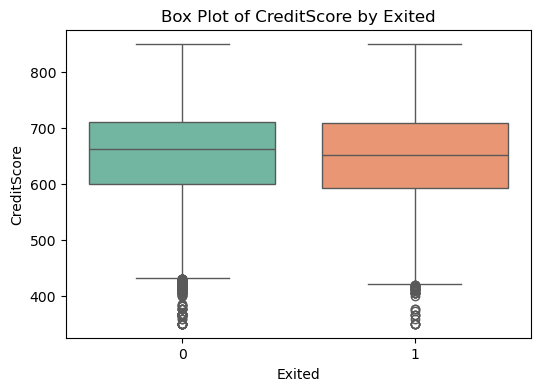

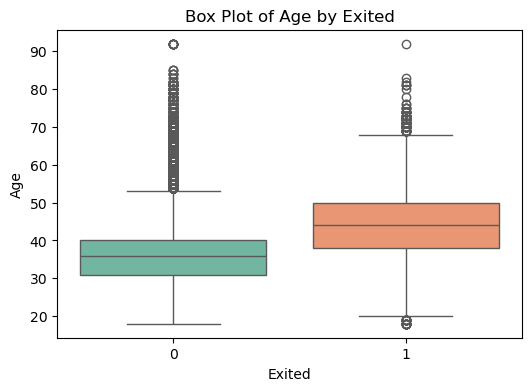

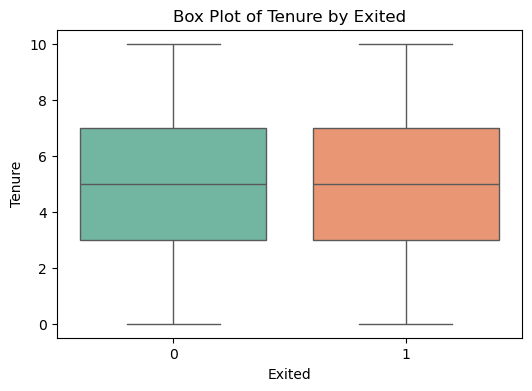

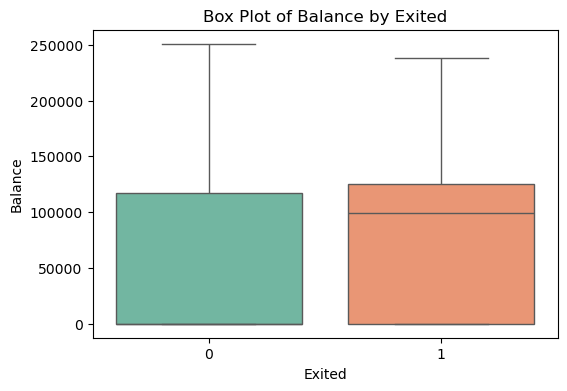

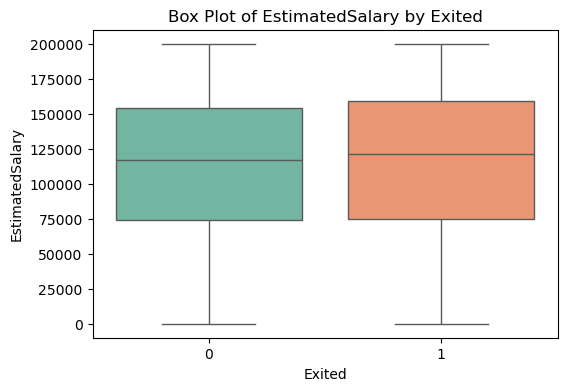

In [26]:
#繪製各個連續變數與Exited的盒形圖
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=var, data=train_df, hue='Exited', palette='Set2', legend=False)
    plt.title("Box Plot of %s by Exited" % var)
    plt.show()

In [27]:
#篩選Exited=0與1的資料
exited_0_df = train_df[train_df['Exited'] == 0]
exited_1_df = train_df[train_df['Exited'] == 1]

#分別計算Exited=0與1的資料中，Balance不為0的百分比
exited_0_balance_not0_ratio = (exited_0_df['Balance'] != 0).mean() * 100
exited_1_balance_not0_ratio = (exited_1_df['Balance'] != 0).mean() * 100

print("Exited=0中Balance不為0的比例 =", round(exited_0_balance_not0_ratio,2), "%")
print("Exited=1中Balance不為0的比例 =", round(exited_1_balance_not0_ratio,2), "%")

Exited=0中Balance不為0的比例 = 42.24 %
Exited=1中Balance不為0的比例 = 58.5 %


**<font color='navy'>
Exited=1的年齡層(Age)較Exited=0的高<br>
Exited=1中信用餘額(Balance)不為0的比例較Exited=0的高
</font>**

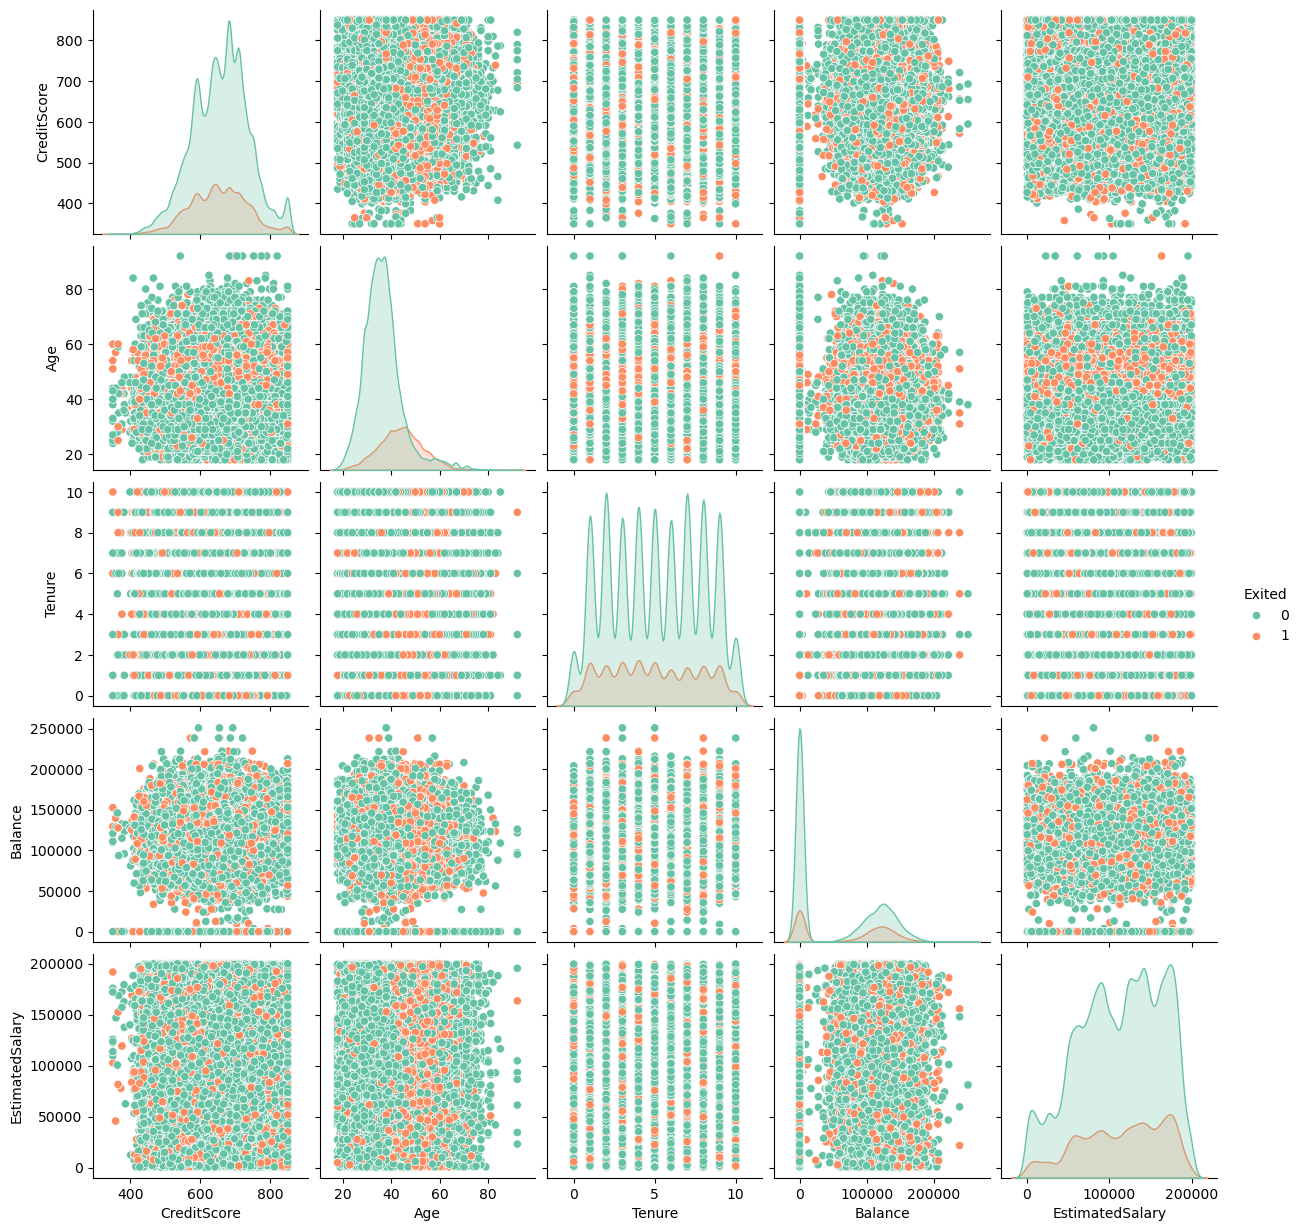

In [29]:
#繪製各連續變數的散佈圖，以Exited分類
sns.pairplot(train_df[continuous_vars + ['Exited']], hue='Exited', palette='Set2')
plt.show()

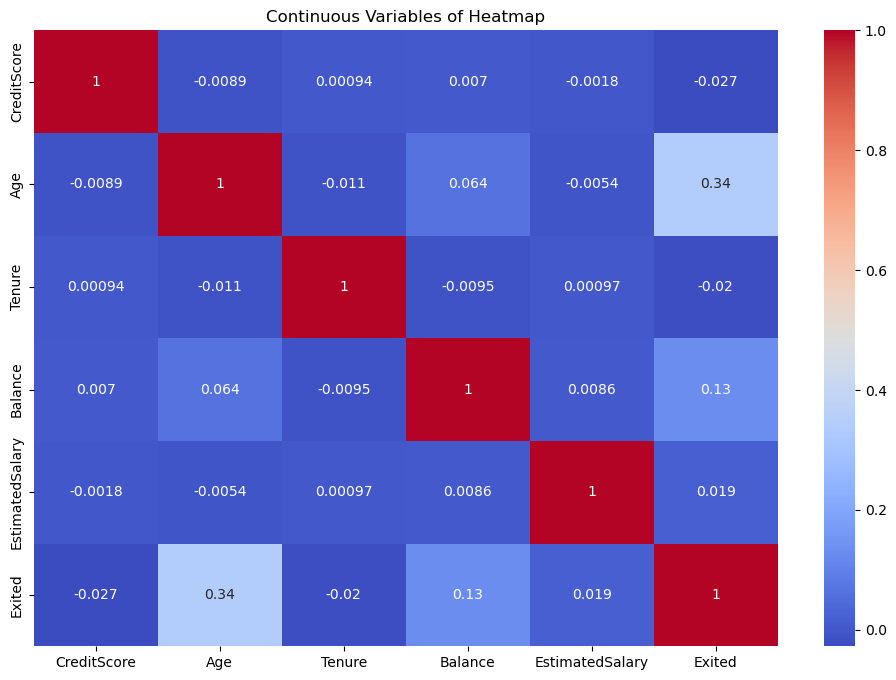

In [30]:
#繪製各連續變數間的相關係數熱圖
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[continuous_vars + ['Exited']].corr(), annot=True, cmap='coolwarm')
plt.title("Continuous Variables of Heatmap")
plt.show()

**<font color='navy'>
特徵變數間的相關性都不高<br>
Age可能對Exited的影響較大，相關係數>0.3
</font>**

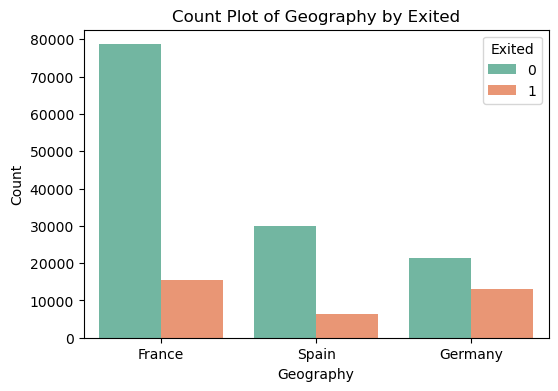

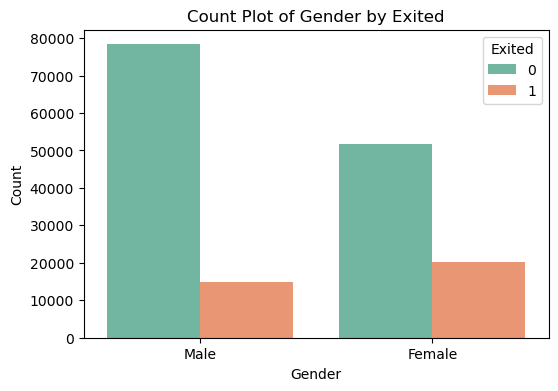

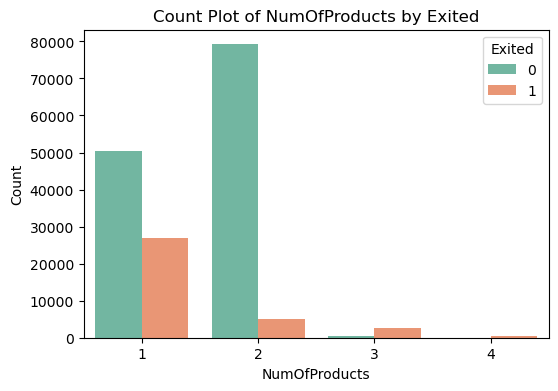

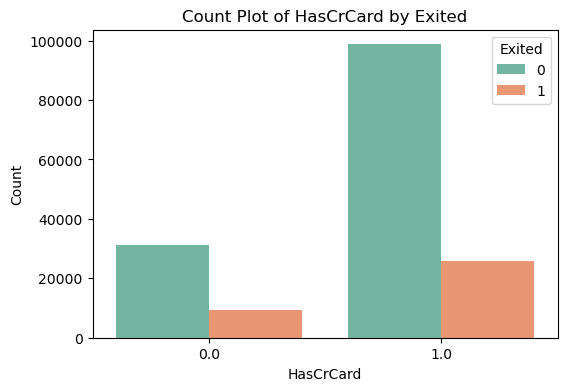

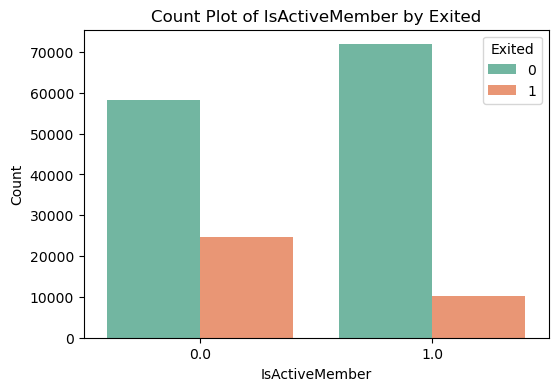

In [32]:
#繪製各個類別變數與Exited的長條圖
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=var, hue='Exited', palette='Set2')
    plt.title("Count Plot of %s by Exited" % var)
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

<h2>特徵工程</h2>

**<font color='navy'>
1.刪除辨識項id, CustomerId, Surname & 刪除Geography<br>
2.檢查並刪除離群值<br>
3.標準化數據(連續變數) & 轉換數據(類別變數)<br>
4.SMOTE類別平衡
</font>**

<h4>1.刪除辨識項id, CustomerId, Surname & 刪除Geography</h4>

In [36]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [37]:
clean_train_df = train_df.drop(columns = ['id','CustomerId','Surname','Geography'])
clean_test_df = test_df.drop(columns = ['id','CustomerId','Surname','Geography'])
clean_train_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<h4>2.檢查並刪除離群值</h4>

In [39]:
#以四分位數範圍定義離群值，並刪除(極端)離群值
def remove_outlier(data, num_vars):
    for var in num_vars:
        Q1 = data[var].quantile(0.25)
        Q3 = data[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]
    return data

In [40]:
#定義要處理的連續變數
num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

#刪除離群值
clean_train_df = remove_outlier(clean_train_df, num_features)
clean_train_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...
165029,667,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<h4>3.標準化數據(連續變數) & 轉換數據(類別變數)</h4>

In [42]:
#標準化連續變數
scaler = StandardScaler()
clean_train_df[num_features] = scaler.fit_transform(clean_train_df[num_features])
clean_train_df[num_features].head()

,CreditScore,Age,Balance,EstimatedSalary
0,0.144277,-0.579920,-0.883130,1.369286
1,-0.367594,-0.579920,-0.883130,-1.255027
2,0.269123,0.223530,-0.883130,1.437242
3,-0.941887,-0.465142,1.486852,-0.557763
4,0.743540,-0.579920,-0.883130,-1.939906


In [43]:
#創建新變數IsMale(Gender轉換)，並刪除Gender
clean_train_df['IsMale'] = clean_train_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
clean_test_df['IsMale'] = clean_test_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
clean_train_df = clean_train_df.drop('Gender', axis = 1)
clean_test_df = clean_test_df.drop('Gender', axis = 1)
clean_train_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale
0,0.144277,-0.579920,3,-0.883130,2,1.0,0.0,1.369286,0,1
1,-0.367594,-0.579920,1,-0.883130,2,1.0,1.0,-1.255027,0,1
2,0.269123,0.223530,10,-0.883130,2,1.0,0.0,1.437242,0,1
3,-0.941887,-0.465142,2,1.486852,1,1.0,1.0,-0.557763,0,1
4,0.743540,-0.579920,5,-0.883130,2,1.0,1.0,-1.939906,0,1


<h2>建立分類模型</h2>

In [45]:
#拆成特徵變數(features)與目標變數(target)
features = clean_train_df.drop('Exited', axis = 1)
target = clean_train_df.Exited

In [46]:
#拆成Tranning Data與Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

In [47]:
#SMOTE類別平衡處理
smote = SMOTE(random_state=50)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

<h4>Random Forest</h4>

In [49]:
RF_model = RandomForestClassifier(random_state=50)
RF_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=50)

In [50]:
#模型預測
y_pred = RF_model.predict(X_test)
print("Classification Report with Random Forest Model:\n", classification_report(y_test, y_pred))

#計算模型正確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

#計算AUC
y_pred_proba = RF_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: %.2f" % auc)

#計算F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: %.2f" % f1)

#計算混淆矩陣
print("Confusion Matrix with Random Forest Model:")
print(confusion_matrix(y_test, y_pred))

Classification Report with Random Forest Model:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     26024
           1       0.61      0.62      0.62      6921

    accuracy                           0.84     32945
   macro avg       0.75      0.76      0.76     32945
weighted avg       0.84      0.84      0.84     32945

Accuracy: 0.84
AUC: 0.86
F1-score: 0.62
Confusion Matrix with Random Forest Model:
[[23288  2736]
 [ 2632  4289]]


In [51]:
#使用K-Fold交叉驗證
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

#評估模型
scores = cross_val_score(RF_model, X_resampled, y_resampled, scoring='roc_auc', cv=cv)
print("Mean AUC %.2f" %np.mean(scores))

Mean AUC 0.96


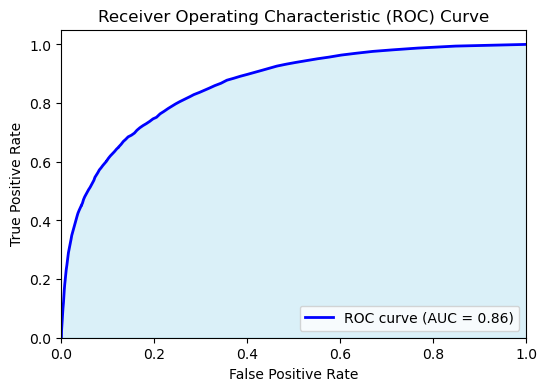

In [52]:
#計算ROC曲線的各個點
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#繪製ROC曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.legend(loc='lower right')
plt.show()

<h4>XGBoost</h4>

In [54]:
XGB_model = XGBClassifier(random_state=50)
XGB_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=50, ...)

In [55]:
#模型預測
y_pred = XGB_model.predict(X_test)
print("Classification Report with XGBoost Model:\n", classification_report(y_test, y_pred))

#計算模型正確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

#計算AUC
y_pred_proba = XGB_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: %.2f" % auc)

#計算F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: %.2f" % f1)

#計算混淆矩陣
print("Confusion Matrix with XGBoost Model:")
print(confusion_matrix(y_test, y_pred))

Classification Report with XGBoost Model:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     26024
           1       0.62      0.65      0.63      6921

    accuracy                           0.84     32945
   macro avg       0.76      0.77      0.77     32945
weighted avg       0.85      0.84      0.84     32945

Accuracy: 0.84
AUC: 0.88
F1-score: 0.63
Confusion Matrix with XGBoost Model:
[[23225  2799]
 [ 2403  4518]]


In [56]:
#使用K-Fold交叉驗證
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

#評估模型
scores = cross_val_score(XGB_model, X_resampled, y_resampled, scoring='roc_auc', cv=cv)
print("Mean AUC %.2f" %np.mean(scores))

Mean AUC 0.95


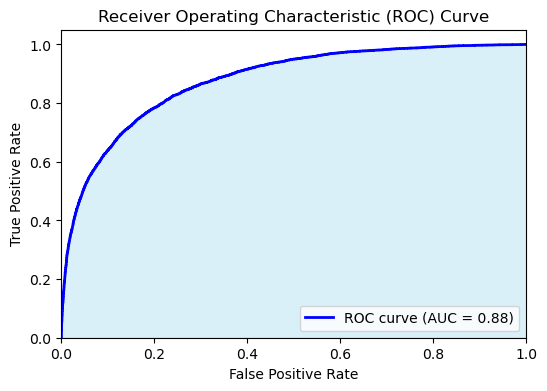

In [57]:
#計算ROC曲線的各個點
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#繪製ROC曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.legend(loc='lower right')
plt.show()

**<font color='navy'>
模型比較 Random Forest v.s XGBoost >> 整體而言XGBoost的表現更優秀
</font>**

<table>
    <tr>
        <th></th>
        <th>Random Forest</th>
        <th>XGBoost</th>
    </tr>
    <tr>
        <th>Accuracy</th>
        <td align="center">0.84</td>
        <td align="center">0.84</td>
    </tr>
    <tr>
        <th>AUC</th>
        <td align="center">0.82</td>
        <td align="center">0.88</td>
    </tr>
    <tr>
        <th>Mean AUC</th>
        <td align="center">0.96</td>
        <td align="center">0.95</td>
    </tr>
    <tr>
        <th>F1-score</th>
        <td align="center">0.62</td>
        <td align="center">0.63</td>
    </tr>
</table>|

<h2>使用XGBoost模型預測測試資料集</h2>

In [60]:
clean_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Age              110023 non-null  float64
 2   Tenure           110023 non-null  int64  
 3   Balance          110023 non-null  float64
 4   NumOfProducts    110023 non-null  int64  
 5   HasCrCard        110023 non-null  float64
 6   IsActiveMember   110023 non-null  float64
 7   EstimatedSalary  110023 non-null  float64
 8   IsMale           110023 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 7.6 MB


In [61]:
test_prob = XGB_model.predict_proba(clean_test_df)[:, 1]
print(test_prob)

[0.03746018 0.3132171  0.09367347 ... 0.08017412 0.03940839 0.22474845]


In [62]:
submission = pd.DataFrame({'id': test_df['id'], 'Exited': test_prob})
submission.to_csv("submission_XGBoost_0630-1.csv", index=False)
submission

,id,Exited
0,165034,0.037460
1,165035,0.313217
2,165036,0.093673
3,165037,0.061804
4,165038,0.099813
...,...,...
110018,275052,0.014356
110019,275053,0.256756
110020,275054,0.080174
110021,275055,0.039408


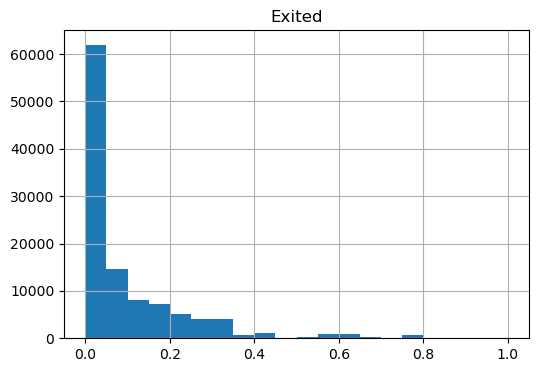

In [63]:
submission.hist(column='Exited', bins=20, range=[0,1],figsize=(6,4))
plt.show()

<h2>優化模型</h2>

<h4>不做SMOTE類別平衡處理</h4>

In [66]:
clean_train_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale
0,0.144277,-0.579920,3,-0.883130,2,1.0,0.0,1.369286,0,1
1,-0.367594,-0.579920,1,-0.883130,2,1.0,1.0,-1.255027,0,1
2,0.269123,0.223530,10,-0.883130,2,1.0,0.0,1.437242,0,1
3,-0.941887,-0.465142,2,1.486852,1,1.0,1.0,-0.557763,0,1
4,0.743540,-0.579920,5,-0.883130,2,1.0,1.0,-1.939906,0,1


In [67]:
#拆成特徵變數(features)與目標變數(target)
features = clean_train_df.drop('Exited', axis = 1)
target = clean_train_df.Exited

In [68]:
#拆成Tranning Data與Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

In [69]:
XGB_model_2 = XGBClassifier(random_state=50)
XGB_model_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=50, ...)

In [70]:
#模型預測
y_pred = XGB_model_2.predict(X_test)
print("Classification Report with XGBoost Model:\n", classification_report(y_test, y_pred))

#計算模型正確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

#計算AUC
y_pred_proba = XGB_model_2.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: %.2f" % auc)

#計算F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: %.2f" % f1)

#計算混淆矩陣
print("Confusion Matrix with XGBoost Model:")
print(confusion_matrix(y_test, y_pred))

Classification Report with XGBoost Model:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     26024
           1       0.72      0.54      0.61      6921

    accuracy                           0.86     32945
   macro avg       0.80      0.74      0.76     32945
weighted avg       0.85      0.86      0.85     32945

Accuracy: 0.86
AUC: 0.88
F1-score: 0.61
Confusion Matrix with XGBoost Model:
[[24572  1452]
 [ 3209  3712]]


In [71]:
#使用K-Fold交叉驗證
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

#評估模型
scores = cross_val_score(XGB_model_2, X_train, y_train, scoring='roc_auc', cv=cv)
print("Mean AUC %.2f" %np.mean(scores))

Mean AUC 0.88


In [72]:
test_prob = XGB_model_2.predict_proba(clean_test_df)[:, 1]
print(test_prob)

[0.02088467 0.5275185  0.06314256 ... 0.09744585 0.06171386 0.4481048 ]


In [73]:
submission = pd.DataFrame({'id': test_df['id'], 'Exited': test_prob})
submission.to_csv("submission_XGBoost_0630-2.csv", index=False)
submission

,id,Exited
0,165034,0.020885
1,165035,0.527519
2,165036,0.063143
3,165037,0.356615
4,165038,0.424413
...,...,...
110018,275052,0.020202
110019,275053,0.096897
110020,275054,0.097446
110021,275055,0.061714


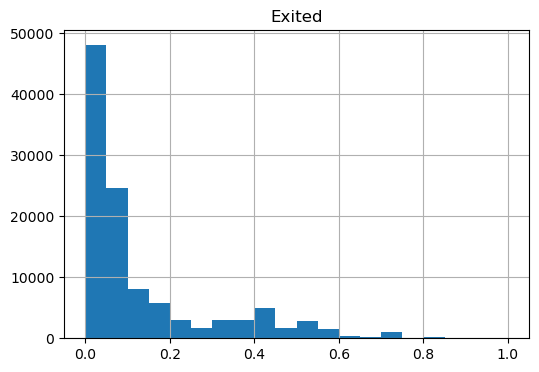

In [74]:
submission.hist(column='Exited', bins=20, range=[0,1],figsize=(6,4))
plt.show()

<h4>挑選最優參數組合</h4>

In [138]:
#挑選模型最優參數組合
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [139]:
#模型預測
y_pred = best_model.predict(X_test)
print("Classification Report with XGBoost Model:\n", classification_report(y_test, y_pred))

#計算模型正確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

#計算AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: %.2f" % auc)

#計算F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: %.2f" % f1)

#計算混淆矩陣
print("Confusion Matrix with XGBoost Model:")
print(confusion_matrix(y_test, y_pred))

Classification Report with XGBoost Model:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90     26024
           1       0.61      0.68      0.64      6921

    accuracy                           0.84     32945
   macro avg       0.76      0.78      0.77     32945
weighted avg       0.85      0.84      0.84     32945

Accuracy: 0.84
AUC: 0.88
F1-score: 0.64
Confusion Matrix with XGBoost Model:
[[22968  3056]
 [ 2206  4715]]


In [140]:
#使用K-Fold交叉驗證
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

#評估模型
scores = cross_val_score(best_model, X_resampled, y_resampled, scoring='roc_auc', cv=cv)
print("Mean AUC %.2f" %np.mean(scores))

Mean AUC 0.94


In [141]:
test_prob = best_model.predict_proba(clean_test_df)[:, 1]
print(test_prob)

[0.04153836 0.49555317 0.14966129 ... 0.11053807 0.09570145 0.38062987]


In [142]:
submission = pd.DataFrame({'id': test_df['id'], 'Exited': test_prob})
submission.to_csv("submission_XGBoost_0630-5.csv", index=False)
submission

,id,Exited
0,165034,0.041538
1,165035,0.495553
2,165036,0.149661
3,165037,0.161368
4,165038,0.130124
...,...,...
110018,275052,0.023642
110019,275053,0.156705
110020,275054,0.110538
110021,275055,0.095701


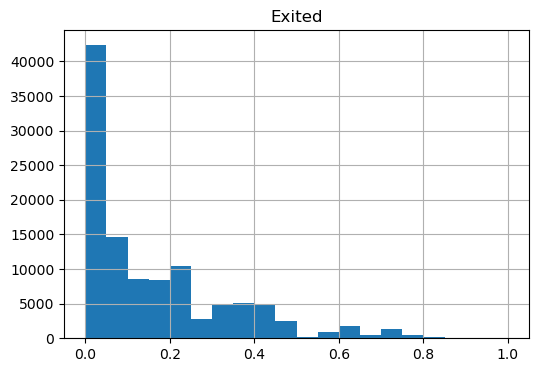

In [143]:
submission.hist(column='Exited', bins=20, range=[0,1],figsize=(6,4))
plt.show()

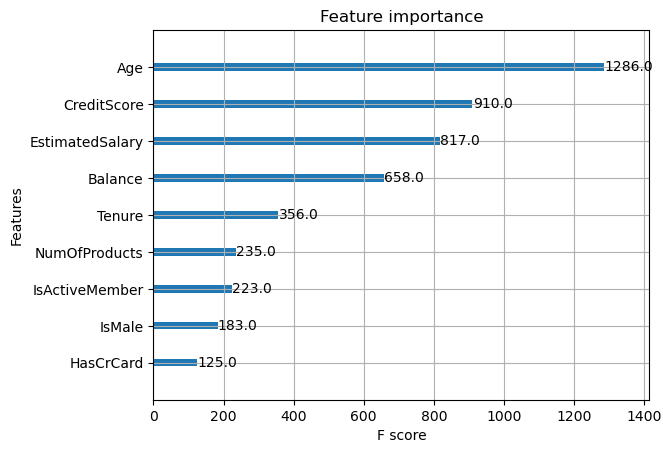

In [144]:
#繪製模型的重要變數
plot_importance(XGB_model, max_num_features=10)
plt.show()